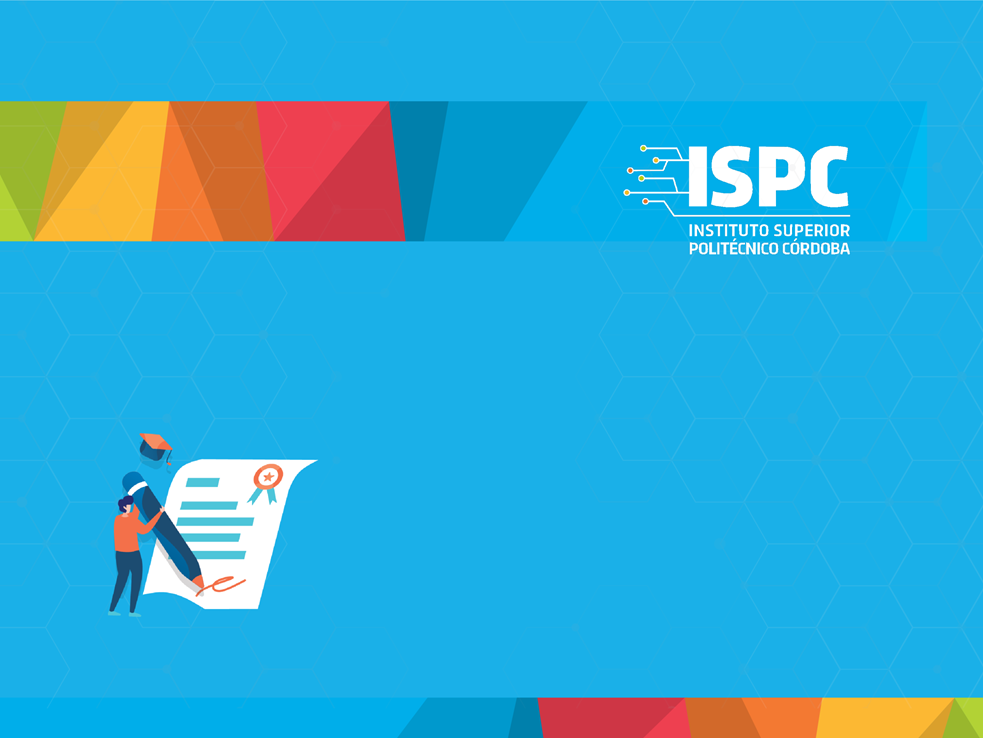

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTITUTO SUPERIOR POLITECNICO CÓRDOBA #

INTEGRANTES: MEDINA, JORGE - CHAYLE, CHRISTIAN

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





In [45]:
########################
# TRATAMIENTO DE DATOS #
#######################

# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

############
# GRÁFICOS #
###########

# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

########################
# PROCESADO Y MODELADO #
########################
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

#===================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

#===================================================
############################
# CONFIGURACIÓN MATPLOTLIB #
###########################
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

##########################
# CONFIGURACIÓN WARNINGS #
#########################
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [46]:
##########
# DATOS #
#########
# ==============================================================================
#from sklearn.datasets import load_SaratogaHouses
#data = load_SaratogaHouses()

url = "https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/SaratogaHouses.csv"
datos = pd.read_csv(url, sep=",")

############################################################
# SE RENOMBRAN LAS COLUMNAS PARA QUE SEAN MÁS DESCRIPTIVAS #
###########################################################

datos.columns = ['precio', 'metros_totales', 'antiguedad', 'precio_terreno','metros_habitables', 'universitarios', 'dormitorios', 'chimenea', 'banyos', 'habitaciones', "calefaccion",'consumo_calefacion', 'desague', 'vistas_lago','nueva_construccion', 'aire_acondicionado']






REALIZAMOS UN ANÁLISIS EXPLORATORIO ANTES DE ENTRENAR EL MODELO


Antes de entrenar un modelo predictivo, o incluso antes de realizar cualquier cálculo con un nuevo conjunto de datos, es muy importante realizar una exploración descriptiva de los mismos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Algunos ejemplos frecuentes son:

-Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.

-Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.

-Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.

In [47]:
datos.head(4)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No


TIPO DE CADA COLUMNA

In [48]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

DIMENSIONES DEL SET DE DATOS

In [49]:
datos.shape

(1728, 16)

NÚMERO DE DATOS AUSENTES POR VARIABLE

In [50]:
datos.isna().sum().sort_values()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

VARIABLE RESPUESTA: La variable precio tiene una distribución asimétrica con una cola positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media.
Este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada.

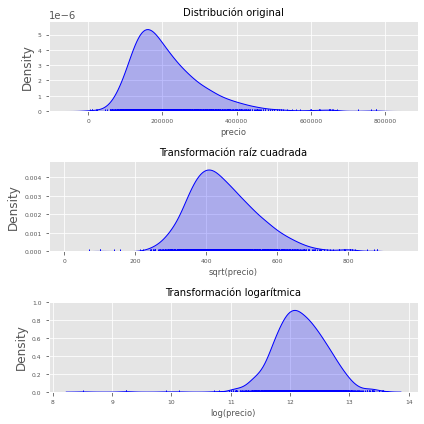

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos.precio,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos.precio),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos.precio),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

LA LIBRERIA FITTER NOS PERMITE IDENTIFICAR A QUE DISTRIBUCIÓN SE AJUSTAN MEJOR LOS DATOS.

In [52]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(datos.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions:   0%|                                                                   | 0/9 [00:00<?, ?it/s]Fitted expon distribution with error=2.9153456083298263e-10)
Fitted norm distribution with error=6.947514167841195e-11)
Fitting 9 distributions:  22%|█████████████                                              | 2/9 [00:00<00:00, 19.93it/s]Fitted logistic distribution with error=4.913879706222384e-11)
Fitted cauchy distribution with error=5.2214497875226175e-11)
Fitting 9 distributions:  44%|██████████████████████████▏                                | 4/9 [00:00<00:00,  7.61it/s]Fitted powerlaw distribution with error=3.0780344366362727e-10)
Fitted exponpow distribution with error=4.841645297543566e-10)
Fitting 9 distributions:  78%|█████████████████████████████████████████████▉             | 7/9 [00:01<00:00,  5.44it/s]Fitted beta distribution with error=2.49741975505997e-11)
Fitted gamma distribution with error=4.841645297543566e-10)
Fitting 9 distributions: 100%|████

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,2.497420e-11,3068.852573,-55037.908642,inf,0.051274,2.180145e-04
logistic,4.913880e-11,3147.967042,-53883.297844,inf,0.071310,4.368626e-08
cauchy,5.221450e-11,2956.669693,-53778.388707,inf,0.121728,9.001774e-23
chi2,5.776892e-11,3321.818880,-53596.249282,inf,0.093520,1.326966e-13
norm,6.947514e-11,3324.534158,-53284.856663,inf,0.104149,8.972690e-17
expon,2.915346e-10,2824.103160,-50806.577128,inf,0.316530,2.028906e-154
powerlaw,3.078034e-10,2741.669837,-50705.287086,inf,0.384832,9.418212e-231
exponpow,4.841645e-10,inf,-49922.566370,NaN,1.000000,0.000000e+00
gamma,4.841645e-10,inf,-49922.566370,3.958212,0.947917,0.000000e+00


In [53]:
datos.select_dtypes(include=['float64', 'int']).describe()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


GRÁFICO DE DISTRIBUCIÓN PARA CADA VARIABLE NUMÉRICA

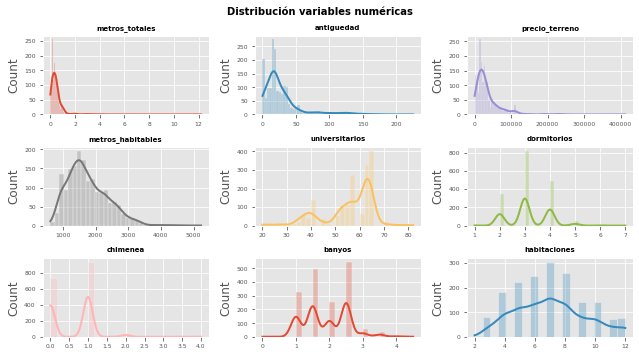

In [54]:
#################################################################
# AJUSTAR NUMEROS DE SUBPLOTS EN FUNCIÓN DEL NÚMERO DE COLUMNAS # 
################################################################

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

A LA VARIABLE CHIMENEA LA TRATAMOS COMO CUALITATIVA

In [55]:
datos.chimenea.value_counts()

1    942
0    740
2     42
4      2
3      2
Name: chimenea, dtype: int64

SE CONVIERTE LA VARIABLE CHIMENEA A TIPO STRING

In [56]:
datos.chimenea = datos.chimenea.astype("str")

GRÁFICO DE DISTRIBUCIÓN PARA CADA VARIABLE NUMÉRICA 

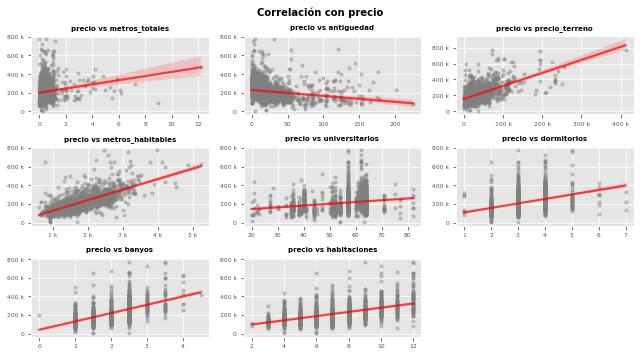

In [57]:
#################################################################
# AJUSTAR NUMEROS DE SUBPLOTS EN FUNCIÓN DEL NÚMERO DE COLUMNAS # 
################################################################

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

###############################
# SE ELIMINAN LOS AXES VACIOS #
##############################

for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

CORRELACIÓN ENTRE COLUMNAS NUMÉRICAS

In [58]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
44,metros_habitables,habitaciones,0.733666,0.733666
76,habitaciones,metros_habitables,0.733666,0.733666
67,banyos,metros_habitables,0.718564,0.718564
43,metros_habitables,banyos,0.718564,0.718564
36,metros_habitables,precio,0.712390,0.712390
4,precio,metros_habitables,0.712390,0.712390
78,habitaciones,dormitorios,0.671863,0.671863
62,dormitorios,habitaciones,0.671863,0.671863
42,metros_habitables,dormitorios,0.656196,0.656196
58,dormitorios,metros_habitables,0.656196,0.656196


MATRIZ DE CORRELACIÓN

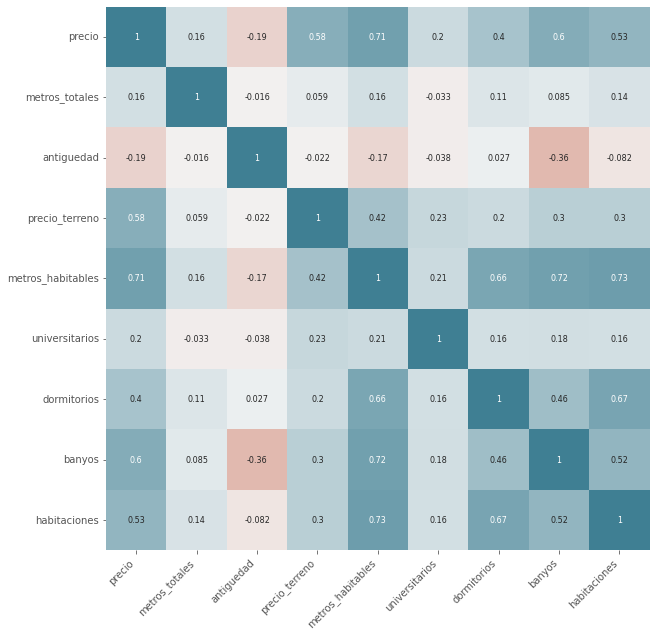

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

VARIABLES CUALITATIVAS - TIPO OBJECT

In [60]:
datos.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


GRÁFICO PARA CADA VARIABLE CUALITATIVA

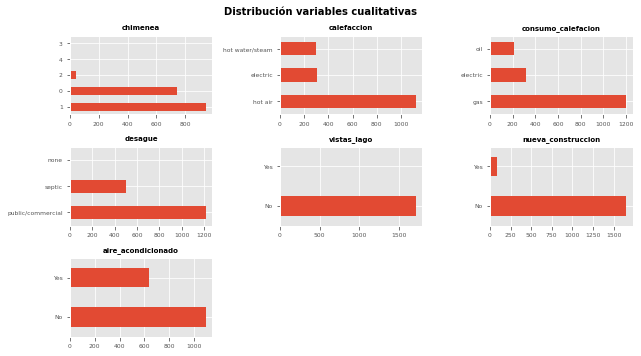

In [61]:
#################################################################
# AJUSTAR NUMEROS DE SUBPLOTS EN FUNCIÓN DEL NÚMERO DE COLUMNAS #
################################################################

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
###############################
# SE ELIMINAN LOS AXES VACIOS #
##############################

for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

UNIFICACIÓN DE LOS NIVELES 2, 3 Y 4 EN UN NIVEL LLAMADO "2_mas"

In [62]:
datos.chimenea.value_counts().sort_index()

0    740
1    942
2     42
3      2
4      2
Name: chimenea, dtype: int64

In [63]:
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = datos['chimenea'] \
                     .map(dic_replace) \
                     .fillna(datos['chimenea'])

In [64]:
datos.chimenea.value_counts().sort_index()

0        740
1        942
2_mas     46
Name: chimenea, dtype: int64

GRÁFICO RELACIÓN ENTRE EL PRECIO Y CADA VARIABLE CUANTITATIVAS

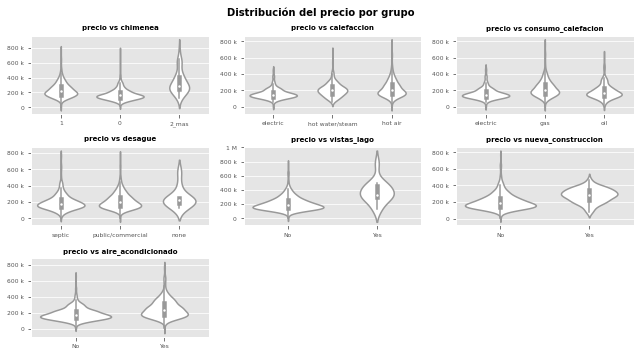

In [65]:
################################################################
# AJUSTAR NÚMERO DE SUBPLOTS EN FUNCIÓN DEL NÚMEROS DE COLUMNAS #
###############################################################

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'precio',
        data  = datos,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
###############################
# SE ELIMINAN LOS AXES VACIOS #
##############################

for i in [7, 8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

DIVISIÓN DE TRAIN Y TEST: REPARTO DE DATOS 

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precio', axis = 'columns'),
                                        datos['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [67]:
print("-----------------------------")
print("= Partición de entrenamento =")
print("-----------------------------")
print(y_train.describe())

-----------------------------
= Partición de entrenamento =
-----------------------------
count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64


In [68]:
print("---------------------")
print("= Partición de test =")
print("---------------------")
print(y_test.describe())

---------------------
= Partición de test =
---------------------
count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64


SELECCIÓN DE LAS VARIABLES POR TIPO

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

################################################################################################################################
# SE ESTANDARIZAN LAS COLUMNAS NUMÉRICAS Y SE HACE ONE-HOT-ENCODING DE LAS COLUMNAS CUALITATIVAS.                              #
# PARA MANTENER LAS COLUMNAS A LAS QUE NO SE LES APLICA NINGUNA TRANSFORMACIÓN, SE TIENE QUE INDICAR REMAINDER = 'PASSTHROUGH' #
################################################################################################################################


numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

In [70]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [71]:
print("---------------------------------------------------------------------------------")
print("##/////////////////////////////////////////////////////////////////////////////##")
print("---------------------------------------------------------------------------------")

encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)

labels = np.concatenate([numeric_cols, encoded_cat])

datos_train_prep = preprocessor.transform(X_train)

datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)

datos_train_prep.info()
print("---------------------------------------------------------------------------------")
print("##/////////////////////////////////////////////////////////////////////////////##")
print("---------------------------------------------------------------------------------")

---------------------------------------------------------------------------------
##/////////////////////////////////////////////////////////////////////////////##
---------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   banyos                       1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chim

REPRESENTACIÓN INTERACTIVA DEL OBJETO PIPELINE

In [72]:
from sklearn import set_config
set_config(display='diagram')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])

In [73]:
set_config(display='text')


CREAR EL MODELO - ENTRENAMIENTO
#==============================#
PREPROCESADO

In [74]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

#####################################################
# IDENTIFICACIÓN DE COLUMNAS NUMÉRICS Y CATEGÓRICAS #
####################################################
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

#################################################
# TRANSFORMACIONES PARA LAS VARIABLES NUMÉRICAS #
################################################
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )
###################################################
# TRANSFORMACIONES PARA LAS VARIABLES CATEGÓRICAS #
##################################################
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# PIPELINE
# ==============================================================================
##########################################################################
# SE COMBINAN LOS PASOS DE PREPROCESADO Y EL MODELO EN UN MISMO PIPELINE #
#########################################################################

pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# TRAIN
# ==============================================================================
##################################################################
# SE ASIGNA EL RESULTADO A _ PARA QUE NO SE IMPRIMA POR PANTALLA #
#################################################################

_ = pipe.fit(X=X_train, y=y_train)

VALIDACIÓN CRUZADA

In [75]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
print("============================================================================================")
print(f"Métricas validación cruzada: {cv_scores}")
print("============================================================================================")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")
print("============================================================================================")

Métricas validación cruzada: [-53936.97817183 -53076.74364513 -62746.15219054 -65963.09754244
 -48929.66260476]
Média métricas de validación cruzada: -56930.52683094103


DIAGNOSTICO ERRORES "RESIDUOS" DE LAS PREDICCIONES DE VALIDACIÓN CRUZADA

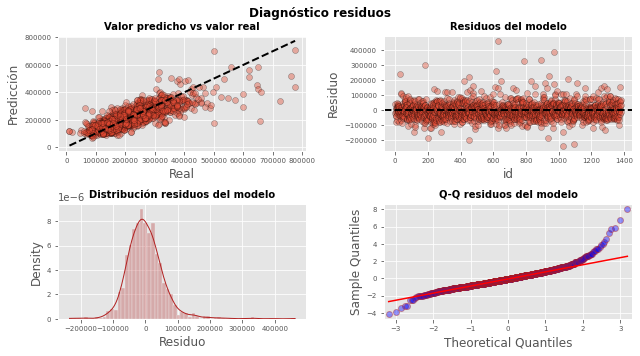

In [76]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
import statsmodels.api as sm

# VALIDACIÓN CRUZADA
# ==============================================================================
cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_prediccones = cross_val_predict(
                    estimator = pipe,
                    X         = X_train,
                    y         = y_train,
                    cv        = cv
                  )

# GRÁFICOS
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))

axes[0, 0].scatter(y_train, cv_prediccones, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), y_train - cv_prediccones,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = y_train - cv_prediccones,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    y_train - cv_prediccones,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


In [77]:
########################################################
# VALIDACIÓN CRUZADA REPETIDA PARALELIZADA (MULTICORE) #
#######################################################
# ==============================================================================
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv,
                n_jobs    = -1 # todos los cores disponibles
             )

print(f"Media métricas de validación cruzada: {cv_scores.mean()}")

Media métricas de validación cruzada: -56735.77500472447


In [78]:
predicciones = pipe.predict(X_test)

In [79]:
#############################################################
# SE CREA UN DATAFRAME CON LAS PREDICCIONES Y EL VALOR REAL #
############################################################

df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,precio,prediccion
903,105000,112491.665253
208,113000,185142.195564
358,110500,168900.516039
1187,159000,139333.302565
319,215000,236967.476884


ERROR DE TEST

In [80]:
# neg_root_mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

65372.91638923966

En la validación cruzada repetida se estimó que el rmse del modelo era de 56735, un valor 
próximo al obtenido con el conjunto de test 65372.

                            

======================
|| REGRESIÓN LINEAL ||
======================

La regresión lineal es un método estadistico que trata de modelar la relación lineal entre una variable continua "Variable Dependiente, respuestas o dependientes" y una o más variables independientes "regresores o predictores" medinate el ajuste de una ecuación lineal . Se llama regresión lineal simple cuando solo hay una variable independiente y regresión lineal múltiple cuando hay más de una.

== Scikit-Learn == incorpora 3 tipos de regularización para los modelos lineales con el objetivo de evitar overfitting, reducir varianza y atenuar el efecto de la correlación entre predictores. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo.

  ================
 |EL MODELO LASSO  |
  ================
    

Es un modelo lineal por mínimos cuadrados que incorpora una regularización que penaliza la suma del valor absolutos de los coeficientes de regresión  (||β||1=∑pk=1|βk|) . A esta penalización se le conoce como l1 y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero. Dado que un predictor con coeficiente de regresión cero no influye en el modelo, lasso consigue seleccionar los predictores más influyentes. El grado de penalización está controlado por el hiperparámetro  λ . Cuando  λ=0 , el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios. A medida que  λ  aumenta, mayor es la penalización y más predictores quedan excluidos.

  ===============
 |EL MODELO RIDGE|
  ===============
    
Es un modelo lineal por mínimos cuadrados que incorpora una regularización que penaliza la suma de los coeficientes elevados al cuadrado  (||β||22=∑pk=1β2k) . A esta penalización se le conoce como l2 y tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero. Al igual que lasso, el grado de penalización está controlado por el hiperparámetro  λ .



In [81]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
10,3.396739,-57142.430478,5459.338238,-55903.680511,1539.867077


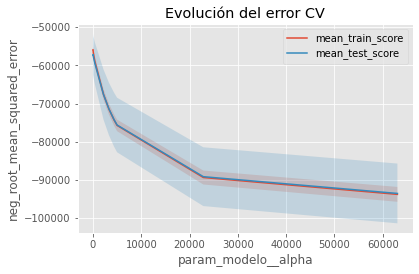

In [82]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

In [83]:
 #Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 65406.82894279459


    =================
    ||RANDON FOREST|| 
    =================
    
    
    Un modelo Random Forest está formado por un conjunto de árboles de decisión individuales, 
    cada uno entrenado con una muestra ligeramente distinta de los datos de entrenamiento generada mediante bootstrapping.
    La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.


In [84]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
17,1000,7,20,-54533.957817,6181.956554,-20197.159238,608.575791


In [85]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 61485.58235393768


Comparación de error de test de los modelos entrenados.

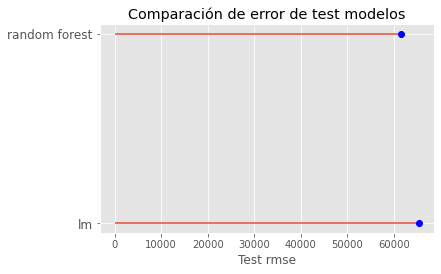

In [86]:
error_modelos = pd.DataFrame({
                        'modelo': ['lm', 'random forest'],
                        'rmse': [ rmse_lm, rmse_rf]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=10, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='blue')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');